In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf 
pysql = lambda q: sqldf(q, globals())

# Expected Outcome:
1. Brainstorm and identify the right metrics and frame proper questions for analysis. Your analysis should help your
    a. Business team to understand the lead's journey and stages with scope for improvement
    b. Business heads to understand their team performance
    c. Managers to understand their target areas
2. In case you identify any outliers in the data set, make a note of them and exclude them from your analysis.
3. Build the best suitable dashboard presenting your insights.

In [3]:
#loading datasets into pandas
leads_basic_details = pd.read_csv("leads_basic_details.csv")
leads_demo_watched_details = pd.read_csv("leads_demo_watched_details.csv")
leads_interaction_details = pd.read_csv("leads_interaction_details.csv")
leads_reasons_for_no_interest = pd.read_csv("leads_reasons_for_no_interest.csv")
sales_managers_assigned_leads_details = pd.read_csv("sales_managers_assigned_leads_details.csv")

In [4]:
#printing each dataframe to better understand structure
leads_basic_details.head() 

#Contains details of the leads.

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals


In [5]:
leads_demo_watched_details.head()

#Contains the details of the senior and junior sales managers and their assigned leads.

    #Each senior sales manager is assigned to 4 junior sales managers.
    #Each junior sales manager is assigned few leads in each cycle (a cycle is approximately a week).

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54


In [6]:
leads_interaction_details.head()

#Contains the details of call interactions of junior sales managers with the leads.

    #A lead can drop out at any stage of the flow. If there is no call by the junior sales manager to the lead after a certain stage then the lead is considered as dropped at that stage.

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup


In [7]:
leads_reasons_for_no_interest.head()

#Contains the details of the demo session watched by the leads.

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN


In [8]:
sales_managers_assigned_leads_details.head()

#Contains the details of the reasons given by the leads for their lack of interest.

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005


# Cleaning all 5 datasets

In [9]:
#Cleaning leads_basic_details data
len(leads_basic_details)

360

In [10]:
leads_basic_details['age'].unique()

array([ 16,  20,  21,  22,  25,  18,  24, 211, 116], dtype=int64)

Found Outliers in 'Age' column of leads_basic_details data.
Need to remove these, but it could very well also be a typo. 211 could actually be 21, 116 could actually be 16. 
Let us investigate the records for these outliers. 

In [11]:
leads_basic_details.query("age > 30")

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
17,USR1018,211,MALE,Hyderabad,Degree,IT Employee,social_media
300,USR1301,116,FEMALE,Hyderabad,Intermediate,Private Employee,social_media


Ok, we should be removing these records, as there is no indication it is a typo (the lead_id is not mentioned again in this table nor do we have their DOB to cross check)

In [12]:
leads_basic_details = leads_basic_details.query("age < 30")

Now the count of rows should be 360-2=358 after removing the outliers

In [13]:
len(leads_basic_details)

358

Let us continue to make sure the other columns in this data do not have any typos/outliers

In [14]:
len(leads_basic_details['lead_id'].unique())

358

In [15]:
leads_basic_details['gender'].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [16]:
leads_basic_details['current_city'].unique()

array(['Hyderabad', 'Bengaluru', 'Visakhapatnam', 'Mumbai', 'Chennai',
       'Kochi'], dtype=object)

In [17]:
leads_basic_details['current_education'].unique()

array(['Intermediate', 'B.Tech', 'Degree', 'Looking for Job',
       '10th Completed', 'Intermediate Completed'], dtype=object)

In [18]:
leads_basic_details['parent_occupation'].unique()

array(['Private Employee', 'Business', 'Lawyer', 'IT Employee',
       'Government Employee', 'Doctor', 'Professor/Faculty'], dtype=object)

In [19]:
leads_basic_details['lead_gen_source'].unique()

array(['social_media', 'user_referrals', 'website', 'SEO',
       'email_marketing'], dtype=object)

In [20]:
# Cleaning leads_demo_watched_details dataset
leads_demo_watched_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lead_id             194 non-null    object
 1   demo_watched_date   194 non-null    object
 2   language            194 non-null    object
 3   watched_percentage  194 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


In [21]:
len(leads_demo_watched_details['lead_id'].unique())

194

In [22]:
leads_demo_watched_details.query("lead_id == 'USR1018' or lead_id == 'USR1301'")

,lead_id,demo_watched_date,language,watched_percentage
16,USR1018,2/20/2022,Hindi,40


Have to remove these records as the associated lead_id were removed from the first dataset

In [23]:
leads_demo_watched_details = leads_demo_watched_details.drop([16])

In [24]:
leads_demo_watched_details.query("lead_id == 'USR1018' or lead_id == 'USR1301'")

,lead_id,demo_watched_date,language,watched_percentage


In [25]:
leads_demo_watched_details['demo_watched_date'].unique()

array(['1/4/2022', '1/7/2022', '1/2/2022', '1/3/2022', '1/12/2022',
       '1/11/2022', '1/8/2022', '1/10/2022', '1/17/2022', '1/16/2022',
       '1/18/2022', '2/21/2022', '2/19/2022', '1/1/2022', '1/6/2022',
       '1/9/2022', '1/21/2022', '1/19/2022', '2/20/2022', '2/22/2022',
       '2/25/2022', '2/23/2022', '1/5/2022', '1/20/2022', '1/26/2022',
       '1/13/2022', '1/22/2022', '2/26/2022', '1/14/2022', '2/28/2022',
       '1/25/2022', '2/27/2022'], dtype=object)

Note: Even though the dataset said it contains 1 month's data, we have data from 2 months in this dataset

In [26]:
leads_demo_watched_details['language'].unique()

array(['Telugu', 'Hindi', 'English'], dtype=object)

In [27]:
leads_demo_watched_details['watched_percentage'].unique()

array([ 42,  81,  35,  38,  54,  52,  41,  50,  48,  44,  46,  51,  47,
        36, 100,   5,  53,   8,  10,  11,  14,  17,  20,  23,  55,  73,
        26,  29,  32,  56,  59,  62,  60,  65,  70,  74,  75,  68,  40,
        85,  71,  86,  87,  88,  89,   2,  90,  91,  92,  77,  80,  63,
        83,  25,   3,   4,  30,  45,  64, 510,  37,  66,  67,  49,  57,
        69,  61,  95,  15,  12,  13,  72,  19, 233,  27,  21,  16,  76,
        18,  79,  78,  22,  24,  28,  82,  84], dtype=int64)

Outlier found in 'watched_percentage' column of leads_demo_watched_details dataset. Watched percentage should not be over 100%. Identified value over 100% (510,233)

In [28]:
leads_demo_watched_details.query("watched_percentage > 100")

,lead_id,demo_watched_date,language,watched_percentage
94,USR1138,2/20/2022,English,510
133,USR1213,1/20/2022,Telugu,233


In [29]:
leads_demo_watched_details = leads_demo_watched_details.query("watched_percentage < 101")

### The count of rows in leads_demo_watched_details dataset should now be 193-2 = 191

In [30]:
len(leads_demo_watched_details)

191

In [31]:
#Cleaning leads_interaction_details dataset
leads_interaction_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jnr_sm_id       2192 non-null   object
 1   lead_id         2192 non-null   object
 2   lead_stage      2192 non-null   object
 3   call_done_date  2192 non-null   object
 4   call_status     2192 non-null   object
 5   call_reason     2192 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


In [32]:
leads_interaction_details['jnr_sm_id'].unique()

array(['JNR1001MG', 'JNR1002MG', 'JNR1003MG', 'JNR1004MG', 'JNR1005MG',
       'JNR1006MG', 'JNR1007MG', 'JNR1008MG', 'JNR1009MG', 'JNR1010MG',
       'JNR1011MG', 'JNR1012MG', 'JNR1013MG', 'JNR1014MG', 'JNR1015MG',
       'JNR1016MG'], dtype=object)

In [33]:
len(leads_interaction_details['lead_id'].unique())

358

In [34]:
len(leads_interaction_details['lead_id'])

2192

In [35]:
leads_interaction_details.query("lead_id == 'USR1018' or lead_id == 'USR1301'")

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
93,JNR1001MG,USR1018,lead,2/19/2022,unsuccessful,lead_introduction
94,JNR1001MG,USR1018,lead,2/19/2022,successful,lead_introduction
95,JNR1001MG,USR1018,lead,2/19/2022,successful,demo_schedule
96,JNR1001MG,USR1018,lead,2/22/2022,successful,demo_not_attended
97,JNR1001MG,USR1018,awareness,2/22/2022,successful,post_demo_followup
1966,JNR1016MG,USR1301,lead,1/1/2022,successful,lead_introduction
1967,JNR1016MG,USR1301,lead,1/1/2022,successful,demo_schedule
1968,JNR1016MG,USR1301,lead,1/1/2022,successful,demo_not_attended
1969,JNR1016MG,USR1301,lead,1/1/2022,successful,demo_not_attended
1970,JNR1016MG,USR1301,lead,1/1/2022,unsuccessful,demo_not_attended


Have to remove these records as the associated lead_id were removed from the first dataset

In [36]:
leads_interaction_details = leads_interaction_details.drop([93,94,95,96,97,1966,1967,1968,1969,1970,1971])

In [37]:
len(leads_interaction_details)

2181

In [38]:
leads_interaction_details.query("lead_id == 'USR1018' or lead_id == 'USR1301'")

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason


In [39]:
leads_interaction_details['call_status'].unique()

array(['successful', 'unsuccessful'], dtype=object)

In [40]:
leads_interaction_details['call_reason'].unique()

array(['lead_introduction', 'demo_schedule', 'post_demo_followup',
       'followup_for_consideration', 'interested_for_conversion',
       'followup_for_conversion', 'successful_conversion',
       'demo_not_attended'], dtype=object)

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
10,JNR1001MG,USR1003,lead,1/4/2022,unsuccessful,lead_introduction
...,...,...,...,...,...,...
2187,JNR1001MG,USR1356,lead,2/21/2022,unsuccessful,lead_introduction
2188,JNR1001MG,USR1357,lead,1/8/2022,unsuccessful,lead_introduction
2189,JNR1001MG,USR1358,lead,1/12/2022,unsuccessful,lead_introduction
2190,JNR1001MG,USR1359,lead,1/22/2022,unsuccessful,lead_introduction


In [41]:
#Cleaning leads_reasons_for_no_interest dataset
leads_reasons_for_no_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 294 non-null    object
 1   reasons_for_not_interested_in_demo      164 non-null    object
 2   reasons_for_not_interested_to_consider  79 non-null     object
 3   reasons_for_not_interested_to_convert   51 non-null     object
dtypes: object(4)
memory usage: 9.3+ KB


In [42]:
leads_reasons_for_no_interest.query("lead_id == 'USR1018' or lead_id == 'USR1301'")

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
11,USR1018,NaN,Can't afford,NaN
242,USR1301,No time for student,NaN,NaN


In [43]:
leads_reasons_for_no_interest = leads_reasons_for_no_interest.drop([11,242])

In [44]:
leads_reasons_for_no_interest.query("lead_id == 'USR1018' or lead_id == 'USR1301'")

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert


In [45]:
#Cleaning sales_managers_assigned_leads_details dataset

sales_managers_assigned_leads_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   snr_sm_id      360 non-null    object
 1   jnr_sm_id      360 non-null    object
 2   assigned_date  360 non-null    object
 3   cycle          360 non-null    int64 
 4   lead_id        360 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.2+ KB


In [46]:
sales_managers_assigned_leads_details.query("lead_id == 'USR1018' or lead_id == 'USR1301'")

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
17,SNR501MG,JNR1001MG,2/19/2022,4,USR1018
300,SNR504MG,JNR1016MG,1/1/2022,1,USR1301


In [47]:
sales_managers_assigned_leads_details = sales_managers_assigned_leads_details.drop([17,300])

In [48]:
sales_managers_assigned_leads_details.query("lead_id == 'USR1018' or lead_id == 'USR1301'")

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id


In [49]:
#saving cleaned data into new csvs
#doing one final sanity check
len(sales_managers_assigned_leads_details)

358

In [50]:
len(leads_reasons_for_no_interest)

292

In [51]:
len(leads_interaction_details)

2181

In [52]:
len(leads_demo_watched_details)

191

In [53]:
len(leads_basic_details)

358

In [174]:
sales_managers_assigned_leads_details.to_csv("sales_managers_assigned_leads_details_cleaned.csv", index= False)
leads_reasons_for_no_interest.to_csv("leads_reasons_for_no_interest_cleaned.csv", index =False)
leads_interaction_details.to_csv("leads_interaction_details_cleaned.csv", index = False)
leads_demo_watched_details.to_csv("leads_demo_watched_details_cleaned.csv" , index = False)
leads_basic_details.to_csv("leads_basic_details_cleaned.csv", index = False)

# Analysing all 5 cleaned datasets

# Analysing leads_basic_details dataset

In [117]:
#loading datasets into pandas
leads_basic_details_cleaned = pd.read_csv("leads_basic_details_cleaned.csv",encoding='utf-8')
leads_demo_watched_details_cleaned = pd.read_csv("leads_demo_watched_details_cleaned.csv")
leads_interaction_details_cleaned = pd.read_csv("leads_interaction_details_cleaned.csv")
leads_reasons_for_no_interest_cleaned = pd.read_csv("leads_reasons_for_no_interest_cleaned.csv")
sales_managers_assigned_leads_details_cleaned = pd.read_csv("sales_managers_assigned_leads_details_cleaned.csv")

In [55]:
leads_basic_details_cleaned.head()

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals


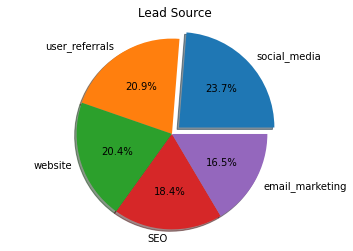

In [56]:
labels = leads_basic_details_cleaned['lead_gen_source'].unique()
x = [len(leads_basic_details_cleaned.query("lead_gen_source == 'social_media'")), len(leads_basic_details_cleaned.query("lead_gen_source == 'SEO'")),len(leads_basic_details_cleaned.query("lead_gen_source == 'email_marketing'")),len(leads_basic_details_cleaned.query("lead_gen_source == 'user_referrals'")),len(leads_basic_details_cleaned.query("lead_gen_source == 'website'")) ]
explode = (0.1, 0, 0, 0,0)

fig, ax = plt.subplots()
ax.pie(x, labels = labels, autopct='%1.1f%%' ,explode=explode, shadow=True)
ax.set_title('Lead Source')
ax.axis('equal')
plt.show()

Social Media generates most lead (23.7%), followed by user_referrals (20.9%), website (20.4%), SE0 (18.4%) and lastly email marketing (16.5%). This pie chart shows a healthy user base as the second highest lead source is by actual users referring others. 

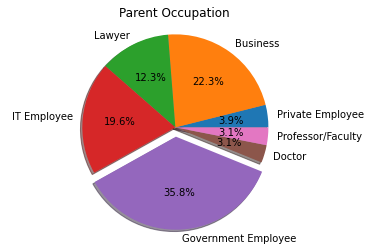

In [57]:
labels = leads_basic_details_cleaned['parent_occupation'].unique()
x = [len(leads_basic_details_cleaned.query("parent_occupation == 'Private Employee'")), len(leads_basic_details_cleaned.query("parent_occupation == 'Business'")),len(leads_basic_details_cleaned.query("parent_occupation == 'Lawyer'")),len(leads_basic_details_cleaned.query("parent_occupation == 'IT Employee'")),len(leads_basic_details_cleaned.query("parent_occupation == 'Government Employee'")),len(leads_basic_details_cleaned.query("parent_occupation == 'Doctor'")),len(leads_basic_details_cleaned.query("parent_occupation == 'Professor/Faculty'")) ]
explode = (0, 0, 0, 0, 0.1, 0, 0)

fig, ax1 = plt.subplots()
ax1.pie(x, labels = labels, autopct='%1.1f%%' ,explode=explode, shadow=True)
ax1.set_title('Parent Occupation')
ax1.axis('equal')
plt.show()


Highest parent occupation is government employee (35.8%), followed by business (22.3%), IT employee (19.6%), lawyer (12.3 %) and lastly private employee, professor and doctor (3.9%, 3.1%, 3.1%) in that order.

Text(0, 0.5, 'Lead Count')

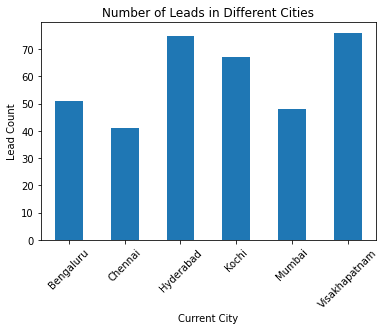

In [58]:
leads_in_cities = leads_basic_details_cleaned.groupby('current_city').size()

leads_in_cities.plot(kind="bar" )
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Number of Leads in Different Cities")
plt.xlabel("Current City")
plt.ylabel("Lead Count")

Text(0, 0.5, 'Lead Count')

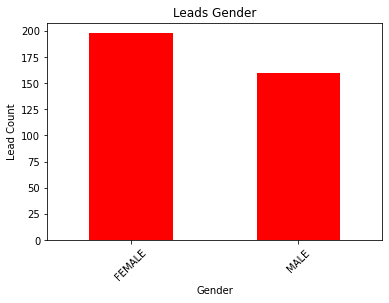

In [59]:
leads_language = leads_basic_details_cleaned.groupby('gender').size()

leads_language.plot(kind="bar", color = 'red')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Leads Gender")
plt.xlabel("Gender")
plt.ylabel("Lead Count")

Text(0, 0.5, 'Lead Count')

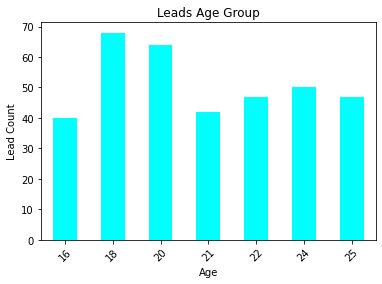

In [60]:
leads_age = leads_basic_details_cleaned.groupby('age').size()

leads_age.plot(kind="bar", color = 'cyan')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Leads Age Group")
plt.xlabel("Age")
plt.ylabel("Lead Count")

Text(0, 0.5, 'Lead Count')

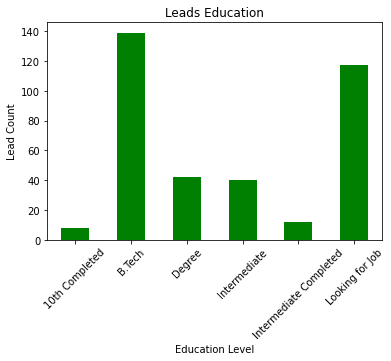

In [61]:
leads_education = leads_basic_details_cleaned.groupby('current_education').size()

leads_education.plot(kind="bar", color = 'green')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Leads Education")
plt.xlabel("Education Level")
plt.ylabel("Lead Count")

# Findings of leads_basic_details dataset

Hyderabad , Visakhapatnam and Kochi have higher number of students interested.

Leads from 'BTech' and 'Looking for job' are more likly to be interested.

Age group of leads ranges from 16 to 25.

Female leads are more likely to be interested compared to male leads.

Leads from Social media are more compared to other Means.

# Analysing leads_demo_watched_details dataset

In [62]:
leads_demo_watched_details_cleaned.head()

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54


Text(0, 0.5, 'Lead Count')

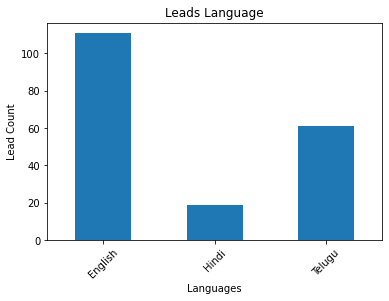

In [63]:
leads_language = leads_demo_watched_details_cleaned.groupby('language').size()

leads_language.plot(kind="bar")
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Leads Language")
plt.xlabel("Languages")
plt.ylabel("Lead Count")

Text(0, 0.5, 'Watched percentage (%)')

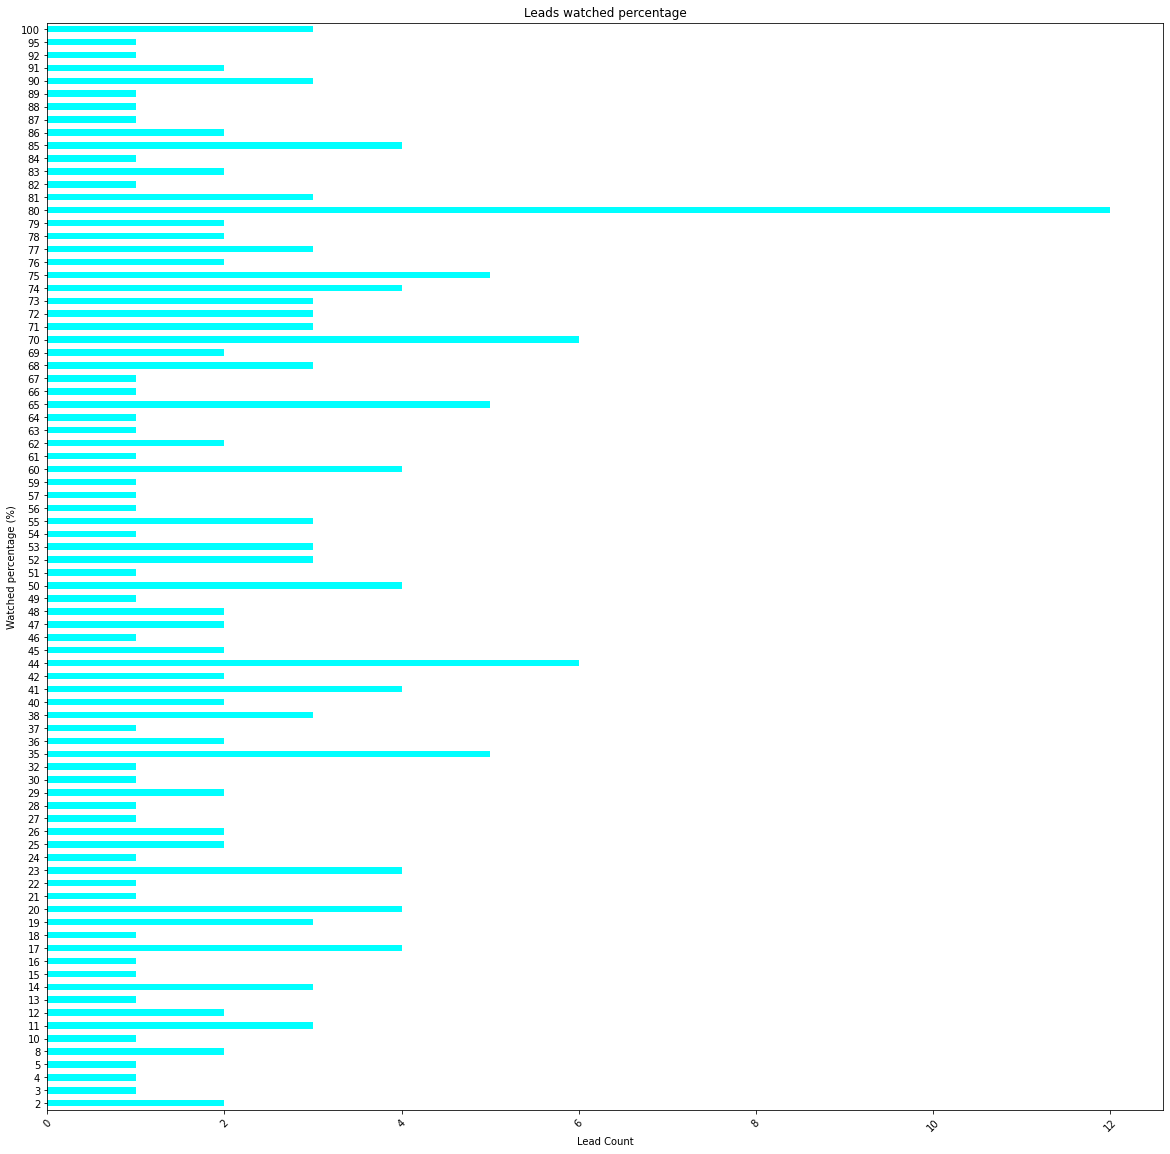

In [231]:
leads_watched_percentage = leads_demo_watched_details_cleaned.groupby('watched_percentage').size()

leads_watched_percentage.plot(kind="barh", color="cyan",figsize=(20, 20))
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Leads watched percentage")
plt.xlabel("Lead Count")
plt.ylabel("Watched percentage (%)")

#  Findings of leads_demo_watched_details dataset

English is the most prefered language to watch with, followed by Telugu and Hindi.

The chance of a lead watching 50% or more of the media is higher.

# Analysing leads_interaction_details dataset merged with leads_demo_watched_details dataset

In [64]:
leads_interaction_details_cleaned.head()

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup


In [65]:
leads_interaction_demo_merged = pd.merge(leads_demo_watched_details_cleaned, leads_interaction_details_cleaned, on=['lead_id'])
leads_interaction_demo_merged.head()

,lead_id,demo_watched_date,language,watched_percentage,jnr_sm_id,lead_stage,call_done_date,call_status,call_reason
0,USR1002,1/4/2022,Telugu,42,JNR1001MG,lead,1/3/2022,successful,lead_introduction
1,USR1002,1/4/2022,Telugu,42,JNR1001MG,lead,1/4/2022,successful,demo_schedule
2,USR1002,1/4/2022,Telugu,42,JNR1001MG,awareness,1/5/2022,successful,post_demo_followup
3,USR1002,1/4/2022,Telugu,42,JNR1001MG,awareness,1/6/2022,successful,followup_for_consideration
4,USR1002,1/4/2022,Telugu,42,JNR1001MG,consideration,1/7/2022,successful,interested_for_conversion


In [66]:
leads_interaction_breakdown1 = pysql('SELECT language, COUNT(call_reason) as count FROM leads_interaction_demo_merged WHERE call_reason ="interested_for_conversion" GROUP BY language')
leads_interaction_breakdown1.head()

,language,count
0,English,81
1,Hindi,16
2,Telugu,44


Text(0, 0.5, 'Lead Count')

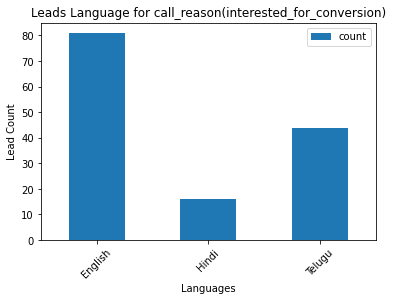

In [67]:
leads_language_count = leads_interaction_breakdown1

leads_language_count.plot(kind="bar" , x = 'language', y = 'count')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Leads Language for call_reason(interested_for_conversion)")
plt.xlabel("Languages")
plt.ylabel("Lead Count")

English speaking leads are the most interested, followed by Telugu speaking leads.

In [68]:
leads_interaction_breakdown2 = pysql('SELECT language, COUNT(call_reason) as count FROM leads_interaction_demo_merged WHERE call_reason ="post_demo_followup" GROUP BY language')
leads_interaction_breakdown2.head()

,language,count
0,English,112
1,Hindi,20
2,Telugu,62


Text(0, 0.5, 'Lead Count')

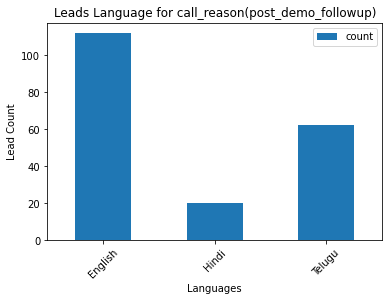

In [69]:
leads_language_count1 = leads_interaction_breakdown2

leads_language_count1.plot(kind="bar" , x = 'language', y = 'count')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Leads Language for call_reason(post_demo_followup)")
plt.xlabel("Languages")
plt.ylabel("Lead Count")

Again, English speaking leads are more interested after demo is taken, followed by Telugu speaking leads

In [70]:
leads_interaction_breakdown3 = pysql('SELECT language, COUNT(call_status) as count FROM leads_interaction_demo_merged WHERE call_status ="unsuccessful" GROUP BY language')
leads_interaction_breakdown3.head()

,language,count
0,English,116
1,Hindi,21
2,Telugu,59


Text(0, 0.5, 'Lead Count')

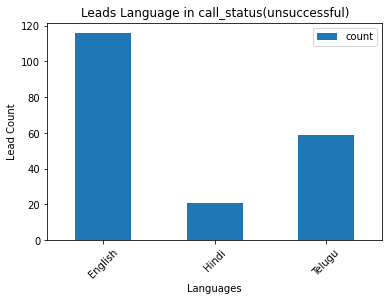

In [71]:
leads_language_count2 = leads_interaction_breakdown3

leads_language_count2.plot(kind="bar" , x = 'language', y = 'count')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Leads Language in call_status(unsuccessful)")
plt.xlabel("Languages")
plt.ylabel("Lead Count")

Again, The most prefered languages English also has the highest unsuccessful conversion rate, followed by Telugu and Hindi

In [73]:
leads_interaction_breakdown4 = pysql('SELECT language, COUNT(call_status) as count FROM leads_interaction_demo_merged WHERE call_status ="successful" and call_reason = "successful_conversion"  GROUP BY language')
leads_interaction_breakdown4.head()

,language,count
0,English,42
1,Hindi,4
2,Telugu,17


Text(0, 0.5, 'Lead Count')

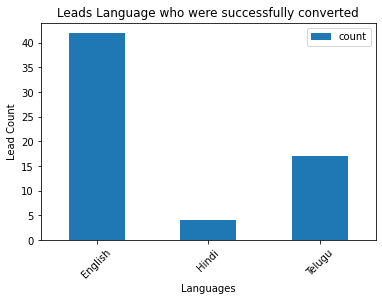

In [75]:
leads_language_count3 = leads_interaction_breakdown4

leads_language_count3.plot(kind="bar" , x = 'language', y = 'count')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Leads Language who were successfully converted")
plt.xlabel("Languages")
plt.ylabel("Lead Count")

In [77]:
leads_interaction_breakdown5 = pysql('SELECT language, AVG(watched_percentage) as Avg_watch_duration FROM leads_interaction_demo_merged GROUP BY language')
leads_interaction_breakdown5.head()

,language,Avg_watch_duration
0,English,56.062975
1,Hindi,50.365517
2,Telugu,50.850716


Text(0, 0.5, 'Lead Count')

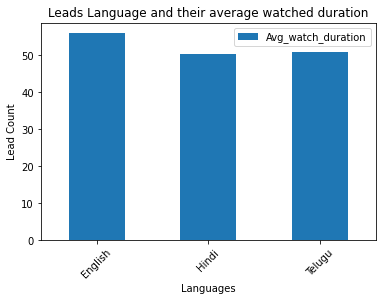

In [79]:
leads_language_count4 = leads_interaction_breakdown5

leads_language_count4.plot(kind="bar" , x = 'language', y = 'Avg_watch_duration')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Leads Language and their average watched duration")
plt.xlabel("Languages")
plt.ylabel("Lead Count")

English speaking leads have the highest average watch duration of demo (56%), followed by Telugu and Hindi

# Findings of leads_interaction_details merged with leads_demo_watched_details dataset

Leads speaking English have a higher conversion rate, followed by Telugu and Hindi

Leads speaking English also have a higher interest rate in different stages of conversion (specially after demo and interested in conversation/conversion), followed by Telugu and Hindi

Leads speaking English also reject the proposal alot more than Telugu and Hindi speakers

# Analysing leads_reasons_for_no_interest dataset

In [119]:
leads_reasons_for_no_interest_cleaned.head()

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN


In [122]:
reason_not_interested_demo_breakdown = pysql("SELECT reasons_for_not_interested_in_demo, COUNT(reasons_for_not_interested_in_demo) as count FROM leads_reasons_for_no_interest_cleaned GROUP BY reasons_for_not_interested_in_demo ORDER BY count DESC")
reason_not_interested_demo_breakdown = reason_not_interested_demo_breakdown.drop([5])
print(reason_not_interested_demo_breakdown)

  reasons_for_not_interested_in_demo  count
0              Wants offline classes     56
1                       Can't afford     48
2   Student not interested in domain     28
3                No time for student     26
4            Will join in final year      5


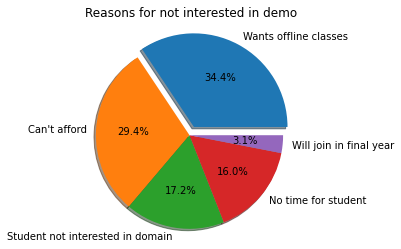

In [124]:
labels = reason_not_interested_demo_breakdown['reasons_for_not_interested_in_demo'].unique()
x = reason_not_interested_demo_breakdown['count']
explode = (0.1, 0, 0, 0, 0)

fig, ax2 = plt.subplots()
ax2.pie(x, labels = labels, autopct='%1.1f%%' ,explode=explode, shadow=True)
ax2.set_title('Reasons for not interested in demo')
ax2.axis('equal')
plt.show()


Wants offline classes (34.4%) has the highest reasons for not being interested in demo, followed by Can't afford (29.4%)

Note: Cannot afford should be Can't afford

In [105]:
reason_not_interested_consider_breakdown = pysql("SELECT reasons_for_not_interested_to_consider, COUNT(reasons_for_not_interested_to_consider) as count FROM leads_reasons_for_no_interest_cleaned GROUP BY reasons_for_not_interested_to_consider ORDER BY count DESC")
reason_not_interested_consider_breakdown = reason_not_interested_consider_breakdown.drop([5])
print(reason_not_interested_consider_breakdown)

  reasons_for_not_interested_to_consider  count
0                           Can't afford     31
1                  Wants offline classes     25
2       Student not interested in domain     14
3                    No time for student      6
4                Will join in final year      2


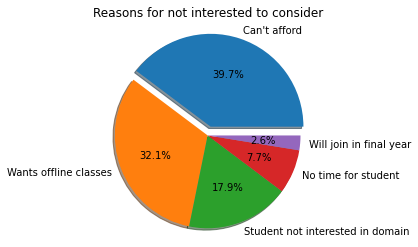

In [108]:
labels = reason_not_interested_consider_breakdown['reasons_for_not_interested_to_consider'].unique()
x = reason_not_interested_consider_breakdown['count']
explode = (0.1, 0, 0, 0, 0)

fig, ax3 = plt.subplots()
ax3.pie(x, labels = labels, autopct='%1.1f%%' ,explode=explode, shadow=True)
ax3.set_title('Reasons for not interested to consider')
ax3.axis('equal')
plt.show()

Can't afford (39.7%) has the highest reasons for not being interested to consider, followed by Wants offline claasses (32.1%)

In [112]:
reason_not_interested_convert_breakdown = pysql("SELECT reasons_for_not_interested_to_convert, COUNT(reasons_for_not_interested_to_convert) as count FROM leads_reasons_for_no_interest_cleaned GROUP BY reasons_for_not_interested_to_convert ORDER BY count DESC")
reason_not_interested_convert_breakdown = reason_not_interested_convert_breakdown.drop([5])
print(reason_not_interested_convert_breakdown)

  reasons_for_not_interested_to_convert  count
0                          Can't afford     19
1                 Wants offline classes     10
2      Student not interested in domain     10
3               Will join in final year      7
4                   No time for student      5


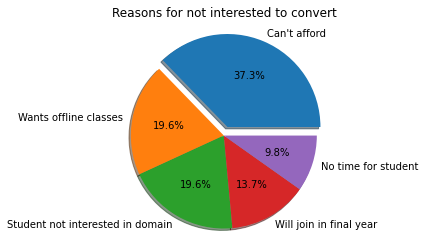

In [113]:
labels = reason_not_interested_convert_breakdown['reasons_for_not_interested_to_convert'].unique()
x = reason_not_interested_convert_breakdown['count']
explode = (0.1, 0, 0, 0, 0)

fig, ax3 = plt.subplots()
ax3.pie(x, labels = labels, autopct='%1.1f%%' ,explode=explode, shadow=True)
ax3.set_title('Reasons for not interested to convert')
ax3.axis('equal')
plt.show()

Can't afford (37.3%) has the highest reasons for not being interested to consider, followed by Wants offline claasses, Student not interested in domain (19.6%)

Note: The reasons for can't afford could also be due to their parents occupation/income. 

Hence we will continue to investigate this trend by joining the details dataset which contains the occupation

# Analysing leads_reasons_for_no_interest dataset by joining leads_basic_details dataset

In [125]:
leads_reason_occupation_merged = pd.merge(leads_reasons_for_no_interest_cleaned,leads_basic_details_cleaned, on='lead_id' )
leads_reason_occupation_merged.head()

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,No time for student,NaN,NaN,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1003,NaN,No time for student,NaN,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
2,USR1004,NaN,Wants offline classes,NaN,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
3,USR1005,NaN,Can't afford,NaN,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
4,USR1006,NaN,Student not interested in domain,NaN,16,MALE,Kochi,Intermediate,Doctor,user_referrals


In [126]:
leads_reason_occupation_breakdown1 = pysql("SELECT reasons_for_not_interested_in_demo, parent_occupation, count(parent_occupation) as count FROM leads_reason_occupation_merged WHERE reasons_for_not_interested_in_demo IS NOT NULL GROUP BY reasons_for_not_interested_in_demo, parent_occupation ")
print(leads_reason_occupation_breakdown1)

   reasons_for_not_interested_in_demo    parent_occupation  count
0                        Can't afford             Business     11
1                        Can't afford               Doctor      1
2                        Can't afford  Government Employee     17
3                        Can't afford          IT Employee      9
4                        Can't afford               Lawyer      8
5                        Can't afford     Private Employee      2
6                 No time for student             Business      4
7                 No time for student  Government Employee      9
8                 No time for student          IT Employee      7
9                 No time for student               Lawyer      1
10                No time for student     Private Employee      3
11                No time for student    Professor/Faculty      2
12   Student not interested in domain             Business      5
13   Student not interested in domain               Doctor      2
14   Stude

In [127]:
leads_reason_occupation_breakdown2 = pysql("SELECT reasons_for_not_interested_to_consider, parent_occupation, count(parent_occupation) as count FROM leads_reason_occupation_merged WHERE reasons_for_not_interested_to_consider IS NOT NULL GROUP BY reasons_for_not_interested_to_consider, parent_occupation ")
print(leads_reason_occupation_breakdown2)

   reasons_for_not_interested_to_consider    parent_occupation  count
0                            Can't afford             Business      6
1                            Can't afford  Government Employee     17
2                            Can't afford          IT Employee      4
3                            Can't afford               Lawyer      4
4                     No time for student             Business      2
5                     No time for student  Government Employee      2
6                     No time for student          IT Employee      1
7                     No time for student               Lawyer      1
8        Student not interested in domain               Doctor      1
9        Student not interested in domain  Government Employee      5
10       Student not interested in domain          IT Employee      5
11       Student not interested in domain               Lawyer      2
12       Student not interested in domain    Professor/Faculty      1
13                  

In [128]:
leads_reason_occupation_breakdown3 = pysql("SELECT reasons_for_not_interested_to_convert, parent_occupation, count(parent_occupation) as count FROM leads_reason_occupation_merged WHERE reasons_for_not_interested_to_convert IS NOT NULL GROUP BY reasons_for_not_interested_to_convert, parent_occupation ")
print(leads_reason_occupation_breakdown3)

   reasons_for_not_interested_to_convert    parent_occupation  count
0                           Can't afford             Business      6
1                           Can't afford  Government Employee      4
2                           Can't afford          IT Employee      6
3                           Can't afford               Lawyer      2
4                           Can't afford     Private Employee      1
5                    No time for student             Business      1
6                    No time for student  Government Employee      2
7                    No time for student               Lawyer      2
8       Student not interested in domain             Business      3
9       Student not interested in domain  Government Employee      3
10      Student not interested in domain          IT Employee      1
11      Student not interested in domain               Lawyer      1
12      Student not interested in domain     Private Employee      1
13      Student not interested in 

# Findings of leads_reasons_for_no_interest

The top 3 reasons across the import stages are Can't afford, Wants offline classes and Students not interested in domain (in that order).

The top 3 parent occupation which result in reason 'Can't afford' are mainly Government Employee, Business and IT Employee (in that order)


# Analysing sales_managers_assigned_leads_details dataset

In [129]:
sales_managers_assigned_leads_details_cleaned.head()

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005


In [131]:
sales_managers_assigned_leads_details_breakdown = pysql("SELECT snr_sm_id,jnr_sm_id,COUNT(lead_id) as count_of_leads FROM sales_managers_assigned_leads_details_cleaned GROUP BY snr_sm_id,jnr_sm_id")
print(sales_managers_assigned_leads_details_breakdown)

   snr_sm_id  jnr_sm_id  count_of_leads
0   SNR501MG  JNR1001MG              33
1   SNR501MG  JNR1002MG              20
2   SNR501MG  JNR1003MG              20
3   SNR501MG  JNR1004MG              20
4   SNR502MG  JNR1005MG              20
5   SNR502MG  JNR1006MG              20
6   SNR502MG  JNR1007MG              20
7   SNR502MG  JNR1008MG              20
8   SNR503MG  JNR1009MG              20
9   SNR503MG  JNR1010MG              21
10  SNR503MG  JNR1011MG              26
11  SNR503MG  JNR1012MG              31
12  SNR504MG  JNR1013MG              20
13  SNR504MG  JNR1014MG              20
14  SNR504MG  JNR1015MG              21
15  SNR504MG  JNR1016MG              26


In [136]:
managers_assigned_interaction_details_merged= pd.merge(leads_interaction_details_cleaned,sales_managers_assigned_leads_details_cleaned, on=['jnr_sm_id','lead_id'])
print(managers_assigned_interaction_details_merged)

      jnr_sm_id  lead_id lead_stage call_done_date   call_status  \
0     JNR1001MG  USR1001       lead       1/2/2022    successful   
1     JNR1001MG  USR1001       lead       1/2/2022    successful   
2     JNR1001MG  USR1002       lead       1/3/2022    successful   
3     JNR1001MG  USR1002       lead       1/4/2022    successful   
4     JNR1001MG  USR1002  awareness       1/5/2022    successful   
...         ...      ...        ...            ...           ...   
2176  JNR1001MG  USR1356       lead      2/21/2022  unsuccessful   
2177  JNR1001MG  USR1357       lead       1/8/2022  unsuccessful   
2178  JNR1001MG  USR1358       lead      1/12/2022  unsuccessful   
2179  JNR1001MG  USR1359       lead      1/22/2022  unsuccessful   
2180  JNR1001MG  USR1360       lead      2/21/2022  unsuccessful   

             call_reason snr_sm_id assigned_date  cycle  
0      lead_introduction  SNR501MG      1/1/2022      1  
1          demo_schedule  SNR501MG      1/1/2022      1  
2      le

In [142]:
managers_assigned_interaction_details_breakdown = pysql('SELECT snr_sm_id,jnr_sm_id,COUNT(lead_id) as count_of_successfully_converted_leads FROM managers_assigned_interaction_details_merged WHERE call_status="successful" and call_reason="successful_conversion" GROUP BY snr_sm_id,jnr_sm_id')
print(managers_assigned_interaction_details_breakdown)

   snr_sm_id  jnr_sm_id  count_of_successfully_converted_leads
0   SNR501MG  JNR1001MG                                      6
1   SNR501MG  JNR1002MG                                      7
2   SNR501MG  JNR1003MG                                      6
3   SNR501MG  JNR1004MG                                      4
4   SNR502MG  JNR1005MG                                      2
5   SNR502MG  JNR1006MG                                      4
6   SNR502MG  JNR1007MG                                      2
7   SNR502MG  JNR1008MG                                      4
8   SNR503MG  JNR1009MG                                      2
9   SNR503MG  JNR1010MG                                      4
10  SNR503MG  JNR1011MG                                      2
11  SNR503MG  JNR1012MG                                      4
12  SNR504MG  JNR1013MG                                      2
13  SNR504MG  JNR1014MG                                      4
14  SNR504MG  JNR1015MG                                

# Findings of sales_managers_assigned_leads_details

JNR1001MG junior manager has the most leads(33), and hence the SNR501MG has the most number of leads(93) spread across the junior managers. 

JNR1016MG junior manager has the most successful conversions (8)

# Final Conclusion and Suggestions

On the business side of things:
1. Female leads are more interested then male but not much disparity. So focus on both genders.
2. Focus more on the top 3 city locations which is Hyderabad, Vishakapatnam and Kochi. These locations also have most English and Telugu speakers which are the 2 most prominent languages to engage with leads and show them materials in these languages
3. Spend more on Social Media, and Website advertising. The user base is already healthy as user referrals are very high. 
4. Come out with dicount for leads whose parents are associated with Government jobs. 
5. Broaden the domain knowledge to fit more leads and if possible, think of offline mode of knowledge transfer. 

On the operations/sales side of things:
1. Combine the best junior managers who had the highest converted % under the top senior managers. 
2. Rotate junior managers not meeting certain % goal 